**Capítulo 4: Treinando modelos**

O Capítulo 4 do livro "Hands-On Machine Learning with Scikit-Learn & TensorFlow" aprofunda a compreensão sobre os **modelos de Machine Learning e seus algoritmos de treinamento**, indo além de tratá-los como "caixas pretas". Este capítulo é crucial para entender como depurar problemas, otimizar modelos e, futuramente, construir redes neurais.

Os principais conceitos abordados são:

*   **Regressão Linear (Linear Regression)**:
    *   É um dos modelos mais simples, usado para fazer predições através de uma **função linear ponderada das características de entrada**, acrescida de um termo de *bias* (ou intercepto).
    *   Sua equação é representada como `life_satisfaction = θ0 + θ1 × GDP_per_capita` ou, de forma vetorizada, `ŷ = hθ(x) = θT · x`, onde `θ` é o vetor de parâmetros do modelo e `x` é o vetor de características da instância.
    *   O desempenho de um modelo de Regressão Linear é avaliado pela **função de custo Mean Squared Error (MSE)**, que mede a distância entre as predições do modelo e os exemplos de treinamento, buscando minimizá-la.
    *   A **Equação Normal (Normal Equation)** é uma solução de "forma fechada" que calcula diretamente os valores de `θ` que minimizam a função de custo, ou seja, fornece o resultado diretamente por uma equação matemática: `θ = (X^T · X)^-1 · X^T · y`. É eficaz para um número pequeno de características, mas sua complexidade computacional se torna proibitiva com muitas características.

*   **Gradiente Descendente (Gradient Descent - GD)**:
    *   É um **algoritmo de otimização genérico e iterativo** que busca minimizar uma função de custo, ajustando gradualmente os parâmetros do modelo.
    *   O **tamanho dos passos** é determinado pelo hiperparâmetro **taxa de aprendizado (learning rate)**. Uma taxa muito pequena resultará em convergência lenta, enquanto uma taxa muito alta pode fazer o algoritmo divergir.
    *   Embora o Gradiente Descendente possa ficar preso em mínimos locais em funções de custo complexas, a função de custo MSE para Regressão Linear é uma **função convexa**, garantindo que o algoritmo (com uma taxa de aprendizado adequada) se aproxime do mínimo global.
    *   A **escala das características** é crucial; se as características tiverem escalas muito diferentes, o GD levará muito mais tempo para convergir.
    *   **Batch Gradient Descent (BGD)**: Calcula o gradiente da função de custo em relação a **todos os parâmetros do modelo, usando todo o conjunto de treinamento** a cada passo. Garante convergência para o mínimo, mas é lento para grandes conjuntos de dados.
    *   **Stochastic Gradient Descent (SGD)**: Calcula o gradiente em relação a **apenas uma instância de treinamento aleatória** a cada passo. É muito mais rápido que o BGD para grandes conjuntos de dados, mas seu progresso é mais errático, saltando aleatoriamente, embora possa escapar de mínimos locais. Exige uma **programação de taxa de aprendizado (learning schedule)** para convergir.
    *   **Mini-batch Gradient Descent**: Calcula os gradientes em **pequenos conjuntos aleatórios de instâncias (mini-batches)**. Oferece um equilíbrio entre BGD e SGD, beneficiando-se da otimização de *hardware* para operações de matriz (como GPUs). Seu caminho é menos errático que o SGD e pode convergir mais perto do mínimo.

*   **Regressão Polinomial (Polynomial Regression)**:
    *   Utilizada para ajustar **datasets não lineares**.
    *   Um modelo linear é treinado após adicionar potências de cada característica como novas características (e.g., `x1^2`, `x1^3`). Também pode adicionar combinações de características (`a*b`, `a^2*b`).
    *   Esta técnica pode levar a uma **explosão combinatória** no número de características, tornando o modelo mais propenso a **overfitting** (superajuste).

*   **Curvas de Aprendizado (Learning Curves)**:
    *   São gráficos que mostram o **desempenho do modelo nos conjuntos de treinamento e validação em função do tamanho do conjunto de treinamento**.
    *   São uma ferramenta essencial para diagnosticar **overfitting e underfitting**. Se o modelo tem bom desempenho no conjunto de treinamento, mas ruim na validação, ele está em *overfitting*. Se for ruim em ambos, está em *underfitting*.
    *   Relacionam-se com o **trade-off entre *bias* e variância**: um modelo de alto *bias* tende a *underfitting*, enquanto um de alta variância tende a *overfitting*.

*   **Modelos Lineares Regularizados (Regularized Linear Models)**:
    *   A **regularização** é uma técnica para **reduzir o overfitting** ao restringir o modelo (diminuir seus "graus de liberdade").
    *   **Ridge Regression**: Adiciona um **termo de penalidade ℓ2** (o quadrado da norma ℓ2 dos pesos do modelo) à função de custo. O hiperparâmetro `α` controla a intensidade da regularização; `α = 0` resulta em Regressão Linear padrão. Tende a manter todos os pesos presentes, mas reduzindo seus valores.
    *   **Lasso Regression (Least Absolute Shrinkage and Selection Operator Regression)**: Adiciona um **termo de penalidade ℓ1** (a norma ℓ1 dos pesos do modelo) à função de custo. Uma característica importante é que tende a **eliminar completamente os pesos das características menos importantes (definindo-os como zero)**, realizando seleção de características e produzindo um modelo esparso.
    *   **Elastic Net**: É um meio-termo entre Ridge e Lasso, combinando as penalidades ℓ1 e ℓ2. É frequentemente preferida em relação à Lasso quando há muitas características fortemente correlacionadas ou quando o número de características é maior que o número de instâncias de treinamento, pois a Lasso pode se comportar de forma errática nesses cenários.

*   **Regressão Logística (Logistic Regression)**:
    *   É um modelo comumente usado para **tarefas de classificação binária**.
    *   Calcula uma soma ponderada das características de entrada (similar à Regressão Linear), mas então aplica a **função logística (ou sigmoide)** `σ(t) = 1 / (1 + exp(-t))` para gerar uma probabilidade estimada de a instância pertencer à classe positiva.
    *   A predição é feita com base nessa probabilidade: se `p ≥ 0.5`, a classe é 1 (positiva); caso contrário, é 0 (negativa).
    *   A **função de custo (log loss ou *cross entropy*)** penaliza o modelo quando ele estima uma baixa probabilidade para a classe alvo.
    *   Possui **fronteiras de decisão lineares**.

*   **Regressão Softmax (Softmax Regression)**:
    *   Uma **generalização da Regressão Logística para lidar diretamente com múltiplas classes mutuamente exclusivas** (também conhecida como Regressão Logística Multinomial).
    *   Para cada instância `x`, o modelo calcula um escore `sk(x) = θkT · x` para cada classe `k`.
    *   Em seguida, aplica a **função softmax** `pk = exp(sk(x)) / Σj exp(sj(x))` aos escores para estimar a probabilidade `pk` de a instância pertencer à classe `k`.
    *   A classe predita é aquela com a maior probabilidade estimada (ou escore mais alto).
    *   A função de custo utilizada é a **entropia cruzada (cross entropy)**, que penaliza o modelo quando ele estima uma baixa probabilidade para a classe alvo. A entropia cruzada tem origem na teoria da informação e mede o quão bem um conjunto de probabilidades estimadas corresponde às classes alvo.
    *   Suas fronteiras de decisão entre quaisquer duas classes são lineares.

O capítulo também ressalta que, para compreender as equações, é necessário conhecimento básico de **álgebra linear e cálculo**.

### **Implementação**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from copy import deepcopy

In [2]:
x = 2*np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

In [3]:
#Função para gerar dados + ruído gaussiano
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [4]:
theta_best

array([[3.97991176],
       [2.95260001]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #adiciona x0=1 a cada instância
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.97991176],
       [9.88511178]])

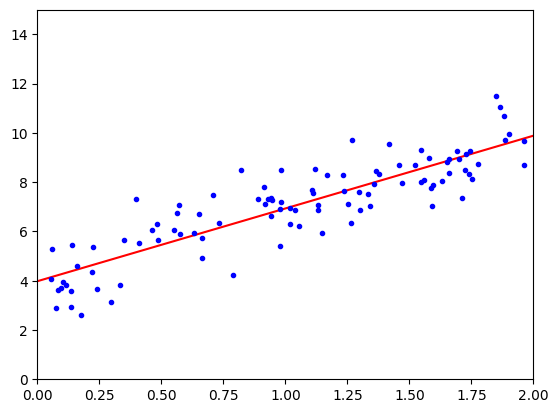

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97991176]), array([[2.95260001]]))

In [8]:
lin_reg.predict(X_new)

array([[3.97991176],
       [9.88511178]])

Gradiente Descencente em lote

Muito lento, utiliza o conjunto inteiro de dados em cada etapa para treinamento

In [9]:
eta = 0.1 #taxa de aprendizado
n_interations = 1000
m=100
theta = np.random.randn(2,1)

In [10]:
theta = theta_best  # Initialize theta with theta_best
for iteration in range(n_interations):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[3.97991176],
       [2.95260001]])

Gradiente descendente estocástico (GDE)

Mais rápido do que o gradiente descendente em lote, pois utiliza apenas uma única instância em cada etapa do treinamento e calcula os gradientes baseado nesta instância. Desvantágem: Ao percorrer a função de custo este algoritmo tem dificuldade de convergir para o mínimo. Vantagem: quando a função de custo é muito irregular este algorítmo pode ajudar a sair do mínimo local e encontrar o mínimo global (explicação detalhada: página 121 e 122). Sklearn = SGDRegressor

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # hiperparâmetros para aprendizado

In [13]:
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # Inicializa theta aleatoriamente
for epoch in range(n_epochs):
    random_index = np.random.randint(m)
    xi = x_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    theta = theta - eta*gradients

In [14]:
theta

array([[3.99967093],
       [2.71161005]])

In [15]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.9634523]), array([2.96907252]))

Gradiente descendente em minilotes

Faz os calculos em pequenos conjuntos aleatórios de instancias (chamadas de minilotes). Vantagem: ganho de desempenho pelas operações de matriz (especialmente quando utiliza-se GPU). Vantagem: Chega-se mais perto do minimo quando comparado com GDE, mas pode ser mais difícil de sair do mínimo local. (SKLEARN: SGDRegressor).

Regressão polinomial

In [17]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5* X**2 + X + 2 + np.random.randn(m,1)

In [18]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([2.57039035, 6.60690654])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [20]:
lin_reg.intercept_, lin_reg.coef_

(array([1.62963825]), array([[0.97942495, 0.57040146]]))

Curvas de aprendizado

In [21]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-",linewidth=3, label="Val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

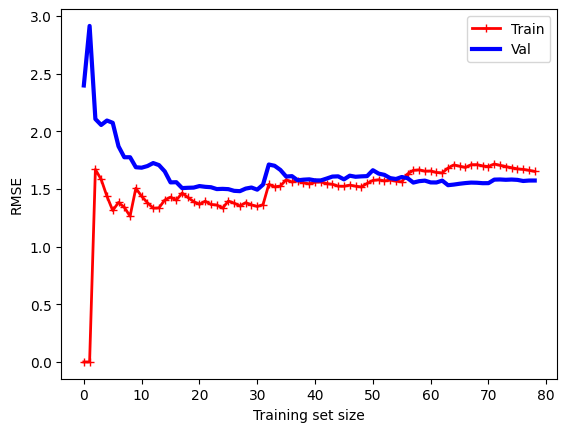

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

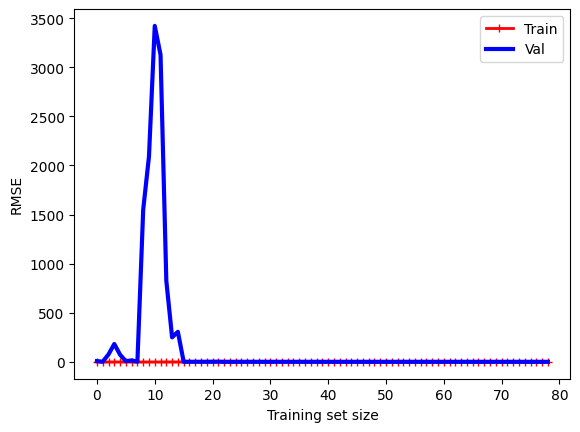

In [23]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)

Modelos Lineares Regularizados

In [24]:
#fatoração de matriz
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.77685856])

In [25]:
#gradiente descendente estocástico
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.75677316])

Regressão Lasso

In [26]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.73008867])

Elastic Net

In [27]:
Elastic_NET = ElasticNet(alpha=0.1, l1_ratio=0.5)
Elastic_NET.fit(X, y)
Elastic_NET.predict([[1.5]])

array([4.7294561])

Parada antecipada

In [28]:
# Dividindo os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# preparação de dados
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_pred, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataC

Regressão Logística

In [30]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [34]:
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(int).astype(np.int) #1 se for virginica, caso contrário 0

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

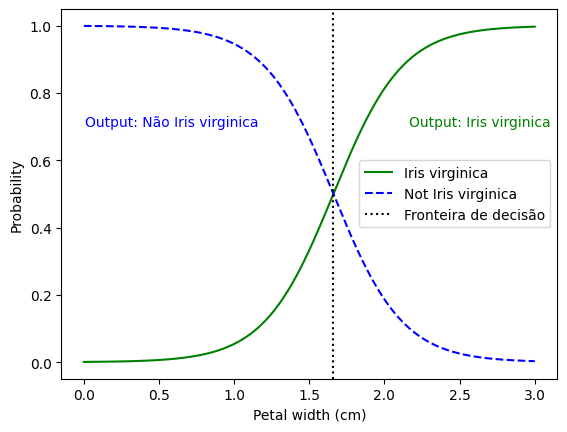

In [41]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
decision_boundary = X_new[np.argmax(y_proba[:, 1] >= 0.5)]
plt.axvline(x=decision_boundary, color='k', linestyle=':', label='Fronteira de decisão')
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.text(decision_boundary-0.5, 0.7, 'Output: Não Iris virginica', color='blue', ha='right')
plt.text(decision_boundary+0.5, 0.7, 'Output: Iris virginica', color='green', ha='left')
plt.show()

Regressão Softmax

In [42]:
X = iris["data"][:,(2,3)] #cumprimento da pétala, largura da pétala
y = iris["target"]

In [43]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [44]:
softmax_reg.predict([[5, 2]])

array([2])

In [45]:
softmax_reg.predict([[5, 2]])

array([2])

In [46]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626370e-07, 5.73689802e-02, 9.42630398e-01]])

### **Exercícios**

1) Qual algoritmo de treinamento de regressão Linear poderemos utilizar se tivermos um conjunto de treinamento com milhoes de características

R: Quando temos um conjunto de treinamento com milhões de características, o algoritmo mais indicado para regressão linear é o **Gradiente Descendente Estocástico (SGD - Stochastic Gradient Descent)**. Isso porque métodos baseados em inversão de matriz (como a solução fechada da equação normal) tornam-se inviáveis devido ao alto custo computacional e de memória. O SGD é eficiente para grandes conjuntos de dados e pode ser usado de forma online ou em minilotes.

2. Suponha que as características do seu conjunto de treinamento tenham escalas muito diferentes. Que algoritmos podem sofrer com isso, e como? O que você pode fazer a respeito?

R: Algoritmos baseados em gradiente, como regressão linear com Gradiente Descendente, Regressão Logística, Redes Neurais e também métodos baseados em regularização (Ridge, Lasso, ElasticNet), podem sofrer quando as características possuem escalas muito diferentes. Isso ocorre porque os parâmetros associados às características de maior escala tendem a dominar o processo de otimização, dificultando a convergência e prejudicando o desempenho do modelo.
Além disso, algoritmos que utilizam distância, como KNN e SVM, também são sensíveis a diferentes escalas.
Para resolver esse problema, recomenda-se aplicar técnicas de normalização ou padronização (por exemplo, StandardScaler ou MinMaxScaler do scikit-learn) para que todas as características tenham escalas semelhantes.

3. O gradiente Descendente pode ficar preso em um mínimo local ao treinar um modelo de Regressão Logística?

R: Não. A função de custo da Regressão Logística (função log-loss) é convexa para problemas binários, o que significa que possui um único mínimo global e nenhum mínimo local. Portanto, o Gradiente Descendente não fica preso em mínimos locais ao treinar um modelo de Regressão Logística binária. Para problemas multiclasse (usando softmax), a função de custo também é convexa.

4. Se todos os algoritmos do Gradiente Descendente forem executados com tempo suficiente, eles o levarão ao mesmo modelo?

R: Não necessariamente. O Gradiente Descendente em lote (Batch Gradient Descent) sempre converge para o mesmo mínimo global (em problemas convexos), pois utiliza todo o conjunto de dados em cada atualização. Já o Gradiente Descendente Estocástico (SGD) e o Gradiente Descendente em Minilotes introduzem aleatoriedade no processo, podendo resultar em soluções diferentes a cada execução, mesmo com tempo suficiente. No entanto, em média, todos tendem a se aproximar do mínimo global, mas o SGD e o Minilote podem oscilar em torno dele devido ao ruído inerente das amostras.

5. Suponha que você utilize o Gradiente Descendente em Lote e plote seu erro de validação em cada época. Se você notar que o erro de validação sempre aumenta, o que provavelmente está acontecendo? Como consertar isso?

R: Se o erro de validação está sempre aumentando durante o treinamento com Gradiente Descendente em Lote, provavelmente a taxa de aprendizado (learning rate) está muito alta. Isso faz com que o algoritmo "pule" o mínimo da função de custo, resultando em pesos cada vez piores a cada época.
Para corrigir isso, reduzé possível reduzir a taxa de aprendizado (eta), testando valores menores até que o erro de validação comece a diminuir ou estabilizar.

6. É uma boa ideia parar o Gradiente Descendente em Minilote imediatamente quando o erro de validação aumentar?

R: Não. O Gradiente Descendente em Minilote (Mini-batch Gradient Descent) apresenta flutuações naturais no erro de validação devido à aleatoriedade dos minilotes. Pequenos aumentos no erro podem ser normais e não indicam necessariamente que o treinamento deve ser interrompido. O ideal é usar técnicas como "early stopping", ou seja, só parar o treinamento se o erro de validação não melhorar após várias épocas consecutivas.

7. Qual algoritmo Gradiente Descendente (entre aqueles que discutimos) se aproximará mais rapidamente da solução ideal? Qual realmente convergirá? Como você pode fazer os outros convergirem também?


R: O Gradiente Descendente em Lote (Batch Gradient Descent) se aproxima mais rapidamente da solução ideal em termos de convergência para o mínimo global, pois utiliza todo o conjunto de dados para calcular os gradientes, resultando em atualizações mais precisas. No entanto, ele pode ser mais lento em termos de tempo por iteração devido ao custo computacional. O Gradiente Descendente Estocástico (SGD) e o Gradiente Descendente em Minilotes (Mini-batch Gradient Descent) introduzem aleatoriedade, o que pode acelerar a aproximação inicial da solução, mas podem oscilar em torno do mínimo global e não convergir exatamente. Para fazer o SGD e o Minilote convergirem, é possível reduzir a taxa de aprendizado (learning rate) gradualmente durante o treinamento, utilizando um cronograma de aprendizado. Isso ajuda a diminuir as oscilações e permite que o modelo se aproxime mais do mínimo global.


8. Suponha que esteja utilizando a Regressão Polinomial. Você plota as curvas de aprendizado e percebe que existe um grande hiato entre o erro de treinamento e o de validação. O que está acontecendo? Quais são as três maneiras de resolver isso?

R: Um grande hiato entre o erro de treinamento e o erro de validação indica que o modelo está sofrendo de overfitting (sobreajuste), ou seja, ele está se ajustando muito bem aos dados de treinamento, mas não generaliza bem para novos dados.
As três maneiras principais de resolver isso são:
1. Reduzir a complexidade do modelo (por exemplo, diminuir o grau do polinômio).
2. Aumentar a quantidade de dados de treinamento.
3. Aplicar regularização (como Ridge, Lasso ou ElasticNet) para penalizar coeficientes grandes e tornar o modelo mais simples.

9. Suponha que você esteja utilizando a Regressão de Ridge e perceba que o erro de treinamento e o de validação são quase iguais e bastante altos. Você diria que o modelo sofre de um viés elevado ou de alta variância? Devemos aumentar o hiperparâmetro alfa ou reduzi-lo?

R: Quando o erro de treinamento e o de validação são quase iguais e ambos altos, isso indica que o modelo sofre de viés elevado (underfitting). Nesse caso, o modelo é muito simples para capturar os padrões dos dados.
Para tentar melhorar o desempenho, deve-se reduzir o hiperparâmetro alfa (α), pois valores altos de alfa aumentam a regularização e tornam o modelo ainda mais simples. Reduzindo alfa, o modelo pode se ajustar melhor aos dados.

R: Para selecionar o melhor modelo de regressão para um conjunto de dados, siga estes passos:
1. Divida os dados em conjuntos de treino, validação e teste.
2. Treine diferentes modelos de regressão (Linear, Ridge, Lasso, ElasticNet, polinomial, etc.) no conjunto de treino.
3. Use validação cruzada para comparar o desempenho dos modelos no conjunto de validação, utilizando métricas como RMSE, MAE ou R².
4. Ajuste os hiperparâmetros dos modelos com base nos resultados da validação cruzada.
5. Escolha o modelo que apresentar o melhor desempenho no conjunto de validação e avalie-o no conjunto de teste para garantir boa generalização.
6. Considere também a simplicidade e interpretabilidade do modelo, além do desempenho.

R:
A) Você utilizaria a Regressão de Ridge em vez da Regressão Linear simples para evitar overfitting, especialmente quando há muitas características correlacionadas ou quando o conjunto de dados é pequeno. A regularização L2 do Ridge penaliza coeficientes grandes, tornando o modelo mais robusto.
B) O Lasso é preferido em relação ao Ridge quando você deseja realizar seleção de características, pois a regularização L1 do Lasso pode zerar coeficientes de características irrelevantes, eliminando-as do modelo.
C) O ElasticNet é útil quando você quer combinar os benefícios do Ridge e do Lasso, ou seja, quando há muitas características correlacionadas e você também deseja seleção automática de variáveis. O ElasticNet aplica tanto a regularização L1 quanto L2.

11. Suponha que você deseja classificar fotos como exteriores/interiores e dia/noite. Você deve implementar dois classificadores de Regressão Logística ou um de Regressão Softmax?

R: Para classificar fotos como exteriores/interiores **e** dia/noite, o ideal é implementar **dois classificadores de Regressão Logística binária separados** (um para cada característica), e não um classificador de Regressão Softmax (multiclasse).

Justifica-se pelo seguinte:
- Cada classificação (exterior/interior e dia/noite) é um problema binário e independente, pois uma foto pode ser, por exemplo, "exterior de dia", "exterior à noite", "interior de dia" ou "interior à noite".
- A Regressão Softmax (multinomial) é indicada quando as classes são mutuamente exclusivas (ex: gato, cachorro, coelho), mas aqui temos duas classificações independentes.
- Usando dois classificadores logísticos, cada um aprende a distinguir uma característica, permitindo combinar os resultados para obter as quatro possibilidades.

12. Implemente o Gradiente Descendente em Lote com parada antecipada para a Regressão Softmax (Sem utilizar o Scikit-Learn).

In [2]:
# Função softmax
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Função de custo (cross-entropy)
def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-15)) / m

# One-hot encoding
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

# Dados de exemplo (X, y)
np.random.seed(42)
X = np.random.randn(200, 3)
y = np.random.randint(0, 4, 200)  # 4 classes
num_classes = 4

# Parâmetros
m, n = X.shape
X_b = np.c_[np.ones((m, 1)), X]  # adiciona bias
theta = np.random.randn(n + 1, num_classes)
y_onehot = one_hot(y, num_classes)

# Hiperparâmetros
learning_rate = 0.1
n_epochs = 1000
tolerance = 1e-4
patience = 10  # épocas sem melhora para parar
best_loss = float('inf')
epochs_no_improve = 0
best_theta = deepcopy(theta)

for epoch in range(n_epochs):
    logits = X_b.dot(theta)
    y_proba = softmax(logits)
    loss = cross_entropy(y_onehot, y_proba)
    # Gradiente
    gradients = X_b.T.dot(y_proba - y_onehot) / m
    theta -= learning_rate * gradients
    # Early stopping
    if loss < best_loss - tolerance:
        best_loss = loss
        best_theta = deepcopy(theta)
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
    if epochs_no_improve >= patience:
        print(f"Parada antecipada na época {epoch}. Melhor loss: {best_loss:.4f}")
        break

# Parâmetros finais
theta = best_theta
print(f"Loss final: {best_loss:.4f}")

Parada antecipada na época 262. Melhor loss: 1.3638
Loss final: 1.3638
